<a href="https://colab.research.google.com/github/leobonn1/devai/blob/main/brazilian_court_decisions_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

dataset = load_dataset('joelniklaus/brazilian_court_decisions')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [8]:
train_texts = dataset['train']['decision_description']
train_labels = dataset['train']['judgment_label']

test_texts = dataset['test']['decision_description']
test_labels= dataset['test']['judgment_label']

print(f'\nTrain size: {len(train_texts)} -- {len(train_labels)}')
print(f'Test size: {len(test_texts)} -- {len(test_labels)}')



Train size: 3234 -- 3234
Test size: 405 -- 405


In [9]:
from collections import Counter

print(f'Train Labels Distribution: {Counter(train_labels)}')
print(f'Test Labels Distribution: {Counter(test_labels)}')

Train Labels Distribution: Counter({'no': 1960, 'partial': 677, 'yes': 597})
Test Labels Distribution: Counter({'no': 234, 'partial': 93, 'yes': 78})


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(train_labels)

train_labels = label_encoder.transform(train_labels)
test_labels = label_encoder.transform(test_labels)

print(f'Train Labels Distribution: {Counter(train_labels)}')
print(f'Test Labels Distribution: {Counter(test_labels)}')

Train Labels Distribution: Counter({0: 1960, 1: 677, 2: 597})
Test Labels Distribution: Counter({0: 234, 1: 93, 2: 78})


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(train_labels)

train_labels = label_encoder.transform(train_labels)
test_labels = label_encoder.transform(test_labels)

print(f'Train Labels Distribution: {Counter(train_labels)}')
print(f'Test Labels Distribution: {Counter(test_labels)}')

Train Labels Distribution: Counter({0: 1960, 1: 677, 2: 597})
Test Labels Distribution: Counter({0: 234, 1: 93, 2: 78})


In [15]:
!python -m spacy download pt_core_news_sm

import spacy

from tqdm import tqdm

def preprocess_texts(list_texts):
  nlp = spacy.load('pt_core_news_sm', disable=['ner'])
  new_texts = []
  with tqdm(total=len(list_texts), desc='Preprocessing') as pbar:
    for text in list_texts:
      doc = nlp(text)
      tokens = [t.lemma_.lower() for t in doc if t.pos_ != 'PUNCT' and not t.is_stop]
      texto_normalizado = ' '.join(tokens)
      new_texts.append(texto_normalizado)
      pbar.update(1)
  return new_texts

train_texts = preprocess_texts(train_texts)

test_texts = preprocess_texts(test_texts)

2023-11-23 00:06:55.964397: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 00:06:55.964491: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 00:06:55.964543: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 00:06:57.846401: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 73.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


Preprocessing: 100%|██████████| 405/405 [00:07<00:00, 52.77it/s]


In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer_option = 'binary'
# vectorizer_option = 'count'
# vectorizer_option = 'tf_idf'

vectorizer = None

if vectorizer_option == 'binary':
  vectorizer = CountVectorizer(binary=True, max_features=None, ngram_range=(1, 1))
elif vectorizer_option == 'count':
  ## INCLUIR O VETORIZADOR DE CONTAGEM SIMPLES
  pass
elif vectorizer_option == 'tf_idf':
  ## INCLUIR O VETORIZADOR USANDO TF-IDF
  pass

print(f'Vectorizer Option: {vectorizer_option}')

Vectorizer Option: binary


In [18]:
X_train = vectorizer.fit_transform(train_texts).toarray()
X_test = vectorizer.transform(test_texts).toarray()

print(f'\nExample Raw Text: {train_texts[0]}')
print(f'\nExample Vectorized Text: {X_train[0]}')
print(f'Vocabulary: {len(vectorizer.vocabulary_)}')


Example Raw Text: direito penal processual penal revisão criminal artigo 621 código processo penal requerente condenado júri popular prática crimes homicídio duplamente qualificado homicídio qualificado tentado pleito refazimento dosimetria pena imposta requerente admissibilidade via revisional precedentes alegação erro processo dosimetria pena comportamento vítima circunstância judicial neutra considerada desfavorável sentenciando precedentes superior tribunal justiça entendimento câmara criminal tribunal justiça afastamento culpabilidade ausência exposição motivos incremento pena-base afastado desvalor valoração atribuída circunstâncias crime mantida fundamentação idônea pena-base reduzida compensação agravante motivação torpe atenuante confissão espontânea pena privativa liberdade redimensionada crime tentado aplicada fração redutora máxima ante distância atos praticados requerente consumação crime pena redimensionada

Example Vectorized Text: [0 0 0 ... 0 0 0]
Vocabulary: 12447


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced',
                                              max_iter=1000), #DEPOIS MUDAR PARA 1000
    'Multinomial NB': MultinomialNB(),
    'KNN': KNeighborsClassifier()
    #INCLUIR MAIS 7 NOVOS ALGORITMOS.
}


Classifier: Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       234
           1       0.66      0.66      0.66        93
           2       0.62      0.58      0.60        78

    accuracy                           0.74       405
   macro avg       0.70      0.69      0.69       405
weighted avg       0.74      0.74      0.74       405



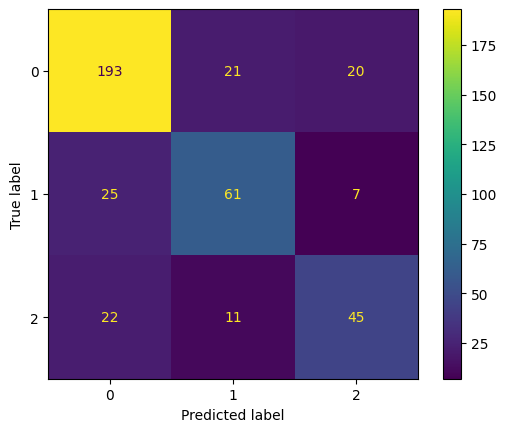


Classifier: Multinomial NB
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       234
           1       0.48      0.61      0.54        93
           2       0.48      0.56      0.52        78

    accuracy                           0.63       405
   macro avg       0.58      0.61      0.59       405
weighted avg       0.66      0.63      0.64       405



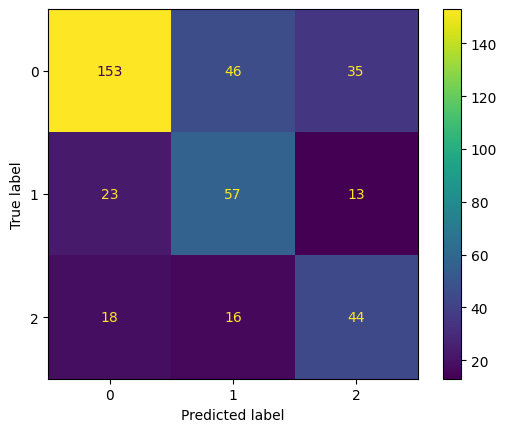


Classifier: KNN
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       234
           1       0.72      0.33      0.46        93
           2       0.53      0.42      0.47        78

    accuracy                           0.67       405
   macro avg       0.65      0.55      0.57       405
weighted avg       0.67      0.67      0.65       405



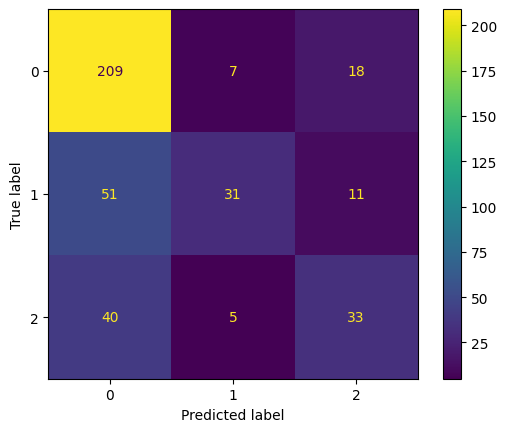

In [21]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

for classifier_name, classifier in classifiers.items():

  print(f'\nClassifier: {classifier_name}')

  classifier.fit(X_train, train_labels)

  y_pred = classifier.predict(X_test)

  report = classification_report(test_labels, y_pred)

  print(report)

  ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

  plt.show()

    """
    Gerar os resultados do classification_report para cada um dos 10 algoritmos.
    Montar uma planilha com os resultados das medidas (Acurácia e weighted avg
    da Precisão, Cobertura e F1-Score).
    Destacar em negrito o melhor algoritmo para cada medida de avaliação.
  """